#Universidad Politécnica Salesiana
#Alumno: Rayner Palta
#Materia: Simulación

#Modifique el código anterior a fin de incorporar los siguientes cambios:

##Considerar 3 tipos de vehículos con 3 diferentes tiempos de lavado:
###Bus: 20 minutos
###Automóvil: 7 minutos
###Furgoneta: 12 minutos

##Considere que a partir de la entrada del vehículo para ser lavado, deberán tomarse en cuenta los siguientes tiempos correspondientes al proceso de traslado desde la recepción a la máquina de lavado:
###Bus: 4 minutos
###Automóvil: 1 minuto
###Furgoneta: 2 minutos

##Realice una gráfica comparativa de la simulación con 3 y con 4 máquinas de lavado

In [2]:
pip install simpy

In [13]:
import simpy
import random
import matplotlib.pyplot as pp
MAX_VEHICULOS = 57 
NUM_MAQUINAS = 3
TRASLADO= [4,1,2]
TIEMPO_LAVADO =[20,7,12] #7 
INTERVALO_LLEGADA = 10
TIEMPO_SIMULACION = 100

tiempo= {}

class Lavanderia(object):
    
    def __init__(self, environment, num_maquinas,tiempo_bus,tiempo_automovil,
                 tiempo_furgoneta,traslado_bus,traslado_automovil,traslado_furgoneta):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        # Creamos el recurso que representa las maquinas
        self.maquinas = simpy.Resource(environment, num_maquinas)
        # Variable para el tiempo de lavado
        self.tiempo_bus = tiempo_bus
        self.tiempo_automovil = tiempo_automovil
        self.tiempo_furgoneta = tiempo_furgoneta
        self.traslado_bus = traslado_bus
        self.traslado_automovil = traslado_automovil
        self.traslado_furgoneta = traslado_furgoneta
        
    def lavar_vehiculo(self, vehiculo):
        automotor=vehiculo.split('-')
        if(automotor[0] == 'Bus'):
            yield self.env.timeout(TRASLADO[0])
        if(automotor[0] == 'Automovil'):
            yield self.env.timeout(TRASLADO[1])
        if(automotor[0] == 'Furgoneta'):
            yield self.env.timeout(TRASLADO[2])
        #Solo agregamos al diccionario al momento que termina de lavar el vehiculo.
        k=automotor[0]
        if k in tiempo:
            tiempo[k]=tiempo[k]+1
        else:
            tiempo[k]=1
            
        # Simulamos que se ha limpiado parte (%) de la suciedad del vehiculo
        # Para el % generamos un entero entre 30 y 90
        print('Removido  {%d%%} suciedad vehiculo => %s ' %(random.randint(30,90), vehiculo))
        
    def trasladar_vehiculo(self, vehiculo):
        automotor=vehiculo.split('-')
        if(automotor[0] == 'Bus'):
            yield self.env.timeout(TRASLADO[0])
        if(automotor[0] == 'Automovil'):
            yield self.env.timeout(TRASLADO[1])
        if(automotor[0] == 'Furgoneta'):
            yield self.env.timeout(TRASLADO[2])
       
    
def llegada_vehiculo(env, nombre, lavanderia):
    print('Llega vehiculo: %s a la hora %.2f.' % (nombre, env.now))
    with lavanderia.maquinas.request() as maquina:
        yield maquina
        print('Se traslada vehiculo: %s a la hora %.2f.' % (nombre,env.now))
        #Procesamos el traslado del vehiculo
        yield env.process(lavanderia.trasladar_vehiculo(nombre))
        # Indicamos que vehiculo entra a la lavanderia
        print('Entra vehiculo a lavarse: %s a la hora %.2f.' % (nombre, env.now))
        # Procesamos la operacion de lavado
        yield env.process(lavanderia.lavar_vehiculo(nombre))
        # Una vez que termina la llamada con 'yield', se indica que se ha lavado el vehiculo
        print('Vehiculo [%s] lavado a las %.2f.' % (nombre, env.now))  
        
def ejecutar_simulacion(env, num_maquinas, tiempo_bus,tiempo_automovil,
                        tiempo_furgoneta,traslado_bus,traslado_automovil,
                        traslado_furgoneta, intervalo):
    lavanderia=Lavanderia(env, num_maquinas, tiempo_bus,tiempo_automovil,
                          tiempo_furgoneta,traslado_bus,traslado_automovil,
                          traslado_furgoneta)
    for i in range(2):
        env.process(llegada_vehiculo(env, 'bus-%d'%(i+1),lavanderia))
        env.process(llegada_vehiculo(env, 'auto-%d'%(i+1),lavanderia))
        env.process(llegada_vehiculo(env, 'furgoneta-%d'%(i+1),lavanderia))
   
    while True:
        yield env.timeout(random.randint(intervalo-3, intervalo+3))
        i+=1
        # Mientras se lavan los vehiculos generamos mas vehiculos
        rnd = random.randint(1,100)
        if rnd <= 20: # Bus 20%, Furgoneta 30% y Automovil 50%
            env.process(llegada_vehiculo(env,'bus-%d'%(i+1),lavanderia))
        elif rnd <= 50:
            env.process(llegada_vehiculo(env,'furgonta-%d'%(i+1),lavanderia))
        else:
            env.process(llegada_vehiculo(env,'movil-%d'%(i+1),lavanderia))

print('')

random.seed(77)

env=simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_MAQUINAS, TIEMPO_LAVADO[0],TIEMPO_LAVADO[1],\
                                TIEMPO_LAVADO[2]\
                                ,TRASLADO[0],TRASLADO[1],TRASLADO[2]
                                , INTERVALO_LLEGADA))

env.run(until = TIEMPO_SIMULACION)


Llega vehiculo: bus-1 a la hora 0.00.
Llega vehiculo: auto-1 a la hora 0.00.
Llega vehiculo: furgoneta-1 a la hora 0.00.
Llega vehiculo: bus-2 a la hora 0.00.
Llega vehiculo: auto-2 a la hora 0.00.
Llega vehiculo: furgoneta-2 a la hora 0.00.
Se traslada vehiculo: bus-1 a la hora 0.00.
Se traslada vehiculo: auto-1 a la hora 0.00.
Se traslada vehiculo: furgoneta-1 a la hora 0.00.
Entra vehiculo a lavarse: bus-1 a la hora 0.00.
Removido  {46%} suciedad vehiculo => bus-1 
Entra vehiculo a lavarse: auto-1 a la hora 0.00.
Removido  {50%} suciedad vehiculo => auto-1 
Entra vehiculo a lavarse: furgoneta-1 a la hora 0.00.
Removido  {42%} suciedad vehiculo => furgoneta-1 
Vehiculo [bus-1] lavado a las 0.00.
Vehiculo [auto-1] lavado a las 0.00.
Vehiculo [furgoneta-1] lavado a las 0.00.
Se traslada vehiculo: bus-2 a la hora 0.00.
Se traslada vehiculo: auto-2 a la hora 0.00.
Se traslada vehiculo: furgoneta-2 a la hora 0.00.
Entra vehiculo a lavarse: bus-2 a la hora 0.00.
Removido  {45%} suciedad v

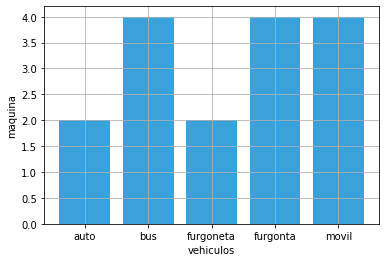

In [20]:
datos = sorted(tiempo.items())
x, y = zip(*datos)
pp.bar(x,y,linewidth=2, color="#39A2DB")
pp.grid(True)
pp.xlabel("vehiculos")
pp.ylabel("maquina")
pp.show()

In [25]:

import simpy
import random
import matplotlib.pyplot as pp
MAX_VEHICULOS = 50
NUM_MAQUINAS = 4
TRASLADO= [4,1,2]
TIEMPO_LAVADO =[20,7,12] 
INTERVALO_LLEGADA = 10
TIEMPO_SIMULACION = 100

tiempo2= {}

class lavado2(object):
    
    def __init__(self, environment, num_maquinas,tiempo_bus,tiempo_automovil,
                 tiempo_furgoneta,traslado_bus,traslado_automovil,traslado_furgoneta):
 
        self.env=environment
       
        self.maquinas = simpy.Resource(environment, num_maquinas)
        self.tiempo_bus = tiempo_bus
        self.tiempo_automovil = tiempo_automovil
        self.tiempo_furgoneta = tiempo_furgoneta
        self.traslado_bus = traslado_bus
        self.traslado_automovil = traslado_automovil
        self.traslado_furgoneta = traslado_furgoneta
        
    def lavar_vehiculo(self, vehiculo):
        automotor=vehiculo.split('-')
        if(automotor[0] == 'Bus'):
            yield self.env.timeout(TRASLADO[0])
        if(automotor[0] == 'Automovil'):
            yield self.env.timeout(TRASLADO[1])
        if(automotor[0] == 'Furgoneta'):
            yield self.env.timeout(TRASLADO[2])
        k=automotor[0]
        if k in tiempo2:
            tiempo2[k]=tiempo2[k]+1
        else:
            tiempo2[k]=1
            
        print('Removido  {%d%%} suciedad vehiculo => %s ' %(random.randint(50,90), vehiculo))
        
    def trasladar_vehiculo(self, vehiculo):
        automotor=vehiculo.split('-')
        if(automotor[0] == 'Bus'):
            yield self.env.timeout(TRASLADO[0])
        if(automotor[0] == 'Automovil'):
            yield self.env.timeout(TRASLADO[1])
        if(automotor[0] == 'Furgoneta'):
            yield self.env.timeout(TRASLADO[2])
       
    
def llegada_vehiculo(env, nombre, lavanderia):
    print('Llega vehiculo: %s a la hora %.2f.' % (nombre, env.now))
    with lavanderia.maquinas.request() as maquina:
        yield maquina
        print('Se traslada vehiculo: %s a la hora %.2f.' % (nombre,env.now))
        yield env.process(lavanderia.trasladar_vehiculo(nombre))
        print('Entra vehiculo a lavarse: %s a la hora %.2f.' % (nombre, env.now))
        yield env.process(lavanderia.lavar_vehiculo(nombre))
        print('Vehiculo [%s] lavado a las %.2f.' % (nombre, env.now))  
        
def ejecutar_simulacion(env, num_maquinas, tiempo_bus,tiempo_automovil,
                        tiempo_furgoneta,traslado_bus,traslado_automovil,
                        traslado_furgoneta, intervalo):
    lavanderia=Lavanderia(env, num_maquinas, tiempo_bus,tiempo_automovil,
                          tiempo_furgoneta,traslado_bus,traslado_automovil,
                          traslado_furgoneta)
    for i in range(2):
        env.process(llegada_vehiculo(env, 'bus-%d'%(i+1),lavanderia))
        env.process(llegada_vehiculo(env, 'auto-%d'%(i+1),lavanderia))
        env.process(llegada_vehiculo(env, 'furgoneta-%d'%(i+1),lavanderia))
   
    while True:
        yield env.timeout(random.randint(intervalo-3, intervalo+3))
        i+=1
        rnd = random.randint(1,100)
        if rnd <= 40: 
            env.process(llegada_vehiculo(env,'bus-%d'%(i+1),lavanderia))
        elif rnd <= 80:
            env.process(llegada_vehiculo(env,'furgonta-%d'%(i+1),lavanderia))
        else:
            env.process(llegada_vehiculo(env,'movil-%d'%(i+1),lavanderia))

print('')

random.seed(77)

env=simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_MAQUINAS, TIEMPO_LAVADO[0],TIEMPO_LAVADO[1],\
                                TIEMPO_LAVADO[2]\
                                ,TRASLADO[0],TRASLADO[1],TRASLADO[2]
                                , INTERVALO_LLEGADA))

env.run(until = TIEMPO_SIMULACION)


Llega vehiculo: bus-1 a la hora 0.00.
Llega vehiculo: auto-1 a la hora 0.00.
Llega vehiculo: furgoneta-1 a la hora 0.00.
Llega vehiculo: bus-2 a la hora 0.00.
Llega vehiculo: auto-2 a la hora 0.00.
Llega vehiculo: furgoneta-2 a la hora 0.00.
Se traslada vehiculo: bus-1 a la hora 0.00.
Se traslada vehiculo: auto-1 a la hora 0.00.
Se traslada vehiculo: furgoneta-1 a la hora 0.00.
Se traslada vehiculo: bus-2 a la hora 0.00.
Entra vehiculo a lavarse: bus-1 a la hora 0.00.
Removido  {46%} suciedad vehiculo => bus-1 
Entra vehiculo a lavarse: auto-1 a la hora 0.00.
Removido  {50%} suciedad vehiculo => auto-1 
Entra vehiculo a lavarse: furgoneta-1 a la hora 0.00.
Removido  {42%} suciedad vehiculo => furgoneta-1 
Entra vehiculo a lavarse: bus-2 a la hora 0.00.
Removido  {45%} suciedad vehiculo => bus-2 
Vehiculo [bus-1] lavado a las 0.00.
Vehiculo [auto-1] lavado a las 0.00.
Vehiculo [furgoneta-1] lavado a las 0.00.
Vehiculo [bus-2] lavado a las 0.00.
Se traslada vehiculo: auto-2 a la hora 0.

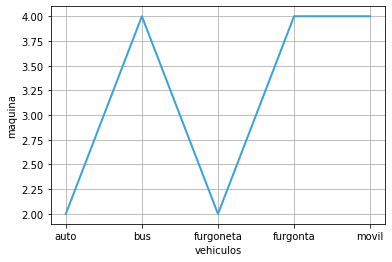

In [27]:
datos2 = sorted(tiempo2.items())
x, y = zip(*datos)
pp.plot(x,y,linewidth=2, color="#39A2DB")
pp.grid(True)
pp.xlabel("vehiculos")
pp.ylabel("maquina")
pp.show()